In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [60]:
with open('/home/ahojel/visual_prompting_vid/output_dir/improv_injection_4/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data = data[1:]
data = [eval(line.strip()) for line in data]

In [61]:
# Create a DataFrame
df = pd.DataFrame(data)

In [62]:
df#[df["lambda"].isna()]

,query_name,support_name,task,lambda,layer,metric,iou,accuracy,r_metric,r_iou,r_accuracy,text_only,all_layers
0,2007_000042,2007_007168,label_segmentation,0.00,0.0,4.603042,0.374567,0.574872,5.516156,0.112330,0.645321,NaN,NaN
1,2007_000042,2007_007168,label_segmentation,0.20,0.0,4.564870,0.373456,0.580067,5.801663,0.117994,0.660255,NaN,NaN
2,2007_000042,2007_007168,label_segmentation,0.40,0.0,4.926636,0.357567,0.579011,5.096135,0.113246,0.681601,NaN,NaN
3,2007_000042,2007_007168,label_segmentation,0.60,0.0,4.819932,0.343650,0.585180,4.427918,0.113711,0.714065,NaN,NaN
4,2007_000042,2007_007168,label_segmentation,0.80,0.0,5.239655,0.313504,0.576658,3.830940,0.100754,0.738495,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176697,2007_001763,2007_001458,label_inpaint single random,0.60,NaN,0.764289,NaN,NaN,0.378523,NaN,NaN,NaN,True
176698,2007_001763,2007_001458,label_inpaint single random,0.65,NaN,0.736261,NaN,NaN,0.358819,NaN,NaN,NaN,True
176699,2007_001763,2007_001458,label_inpaint single random,0.70,NaN,0.799650,NaN,NaN,0.507785,NaN,NaN,NaN,True
176700,2007_001763,2007_001458,label_inpaint single random,0.75,NaN,0.821787,NaN,NaN,0.537791,NaN,NaN,NaN,True


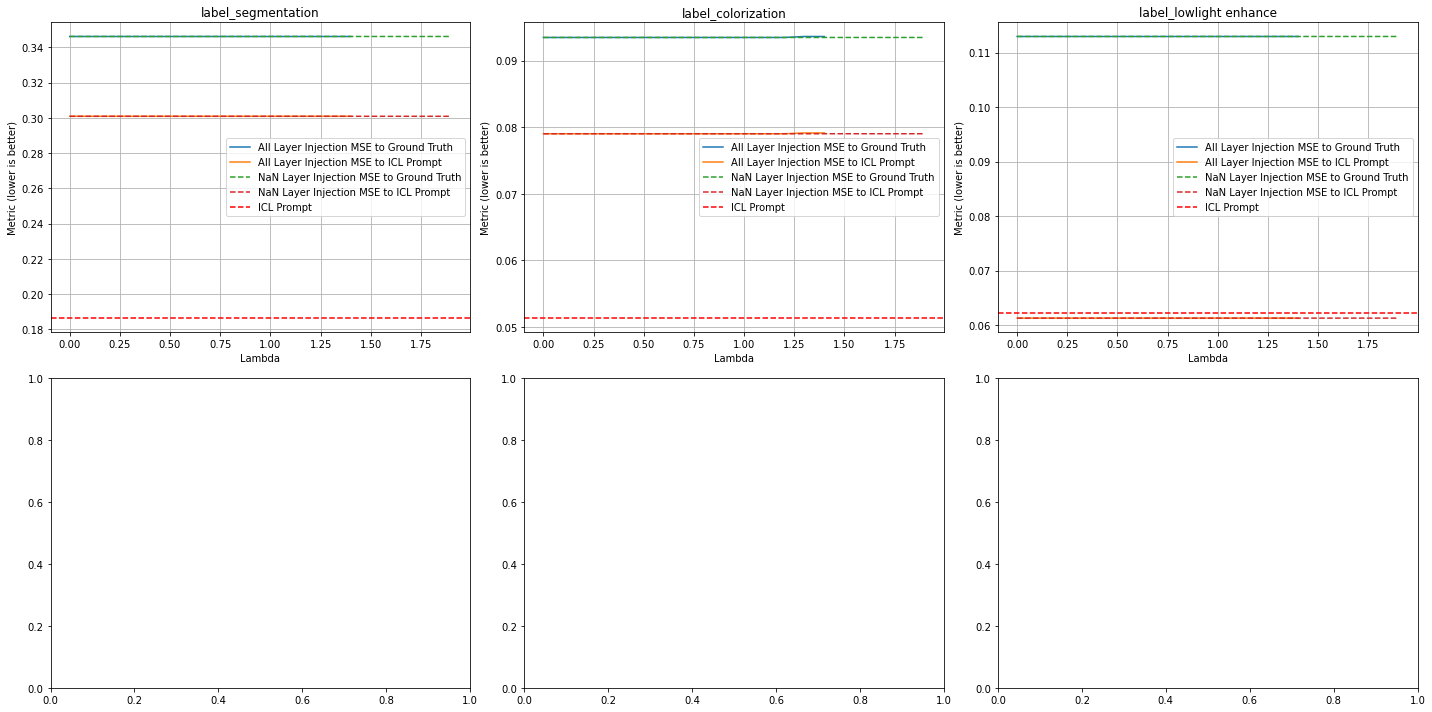

In [8]:
unique_tasks = df['task'].unique()
unique_tasks = ['label_segmentation', 'label_colorization', 'label_lowlight enhance']

# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Filter the dataframe for the current task and group by 'lambda' and 'vector'
    df_task = df[(df['task'] == task)]
    df_baseline = df[df['task'] == task]

    # Separate dataframes for all_layer True and NaN
    df_task_all_layer = df_task[df_task['all_layers'] == True]
    df_task_nan_layer = df_task[df_task['all_layers'].isna()]

    # Group by 'lambda' and 'all_layer', then calculate the mean for each group
    grouped_data_all_layer = df_task_all_layer.groupby(['lambda'])[['metric', 'r_metric']].mean().reset_index()
    grouped_data_nan_layer = df_task_nan_layer.groupby(['lambda'])[['metric', 'r_metric']].mean().reset_index()

    # Convert to numpy arrays before plotting
    lambda_values_all_layer = grouped_data_all_layer['lambda'].to_numpy()
    metric_values_all_layer = grouped_data_all_layer['metric'].to_numpy()
    r_metric_values_all_layer = grouped_data_all_layer['r_metric'].to_numpy()

    lambda_values_nan_layer = grouped_data_nan_layer['lambda'].to_numpy()
    metric_values_nan_layer = grouped_data_nan_layer['metric'].to_numpy()
    r_metric_values_nan_layer = grouped_data_nan_layer['r_metric'].to_numpy()

    # Plot the 'metric' and 'r_metric' for the selected layers
    axes[row, col].plot(lambda_values_all_layer, metric_values_all_layer, label='All Layer Injection MSE to Ground Truth')
    axes[row, col].plot(lambda_values_all_layer, r_metric_values_all_layer, label='All Layer Injection MSE to ICL Prompt')
    axes[row, col].plot(lambda_values_nan_layer, metric_values_nan_layer, '--', label='NaN Layer Injection MSE to Ground Truth')
    axes[row, col].plot(lambda_values_nan_layer, r_metric_values_nan_layer, '--', label='NaN Layer Injection MSE to ICL Prompt')

    # Add a legend to the plot
    lines, labels = axes[row, col].get_legend_handles_labels()
    axes[row, col].legend(lines, labels, loc=0)
    baseline = df_baseline[df_baseline['lambda'].isna()]["metric"].mean()
    axes[row, col].axhline(y=baseline, color='red', linestyle='--', label='ICL Prompt')
    
    axes[row, col].set_title(task)
    axes[row, col].set_xlabel('Lambda')
    axes[row, col].set_ylabel('Metric (lower is better)')
    axes[row, col].legend()
    axes[row, col].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [35]:
df

,query_name,support_name,task,lambda,layer,metric,iou,accuracy,r_metric,r_iou,r_accuracy,text_only,all_layers
0,2007_000042,2007_007168,label_segmentation,0.0,0.0,4.603042,0.374567,0.574872,5.516156,0.112330,0.645321,NaN,NaN
1,2007_000042,2007_007168,label_segmentation,0.2,0.0,4.564870,0.373456,0.580067,5.801663,0.117994,0.660255,NaN,NaN
2,2007_000042,2007_007168,label_segmentation,0.4,0.0,4.926636,0.357567,0.579011,5.096135,0.113246,0.681601,NaN,NaN
3,2007_000042,2007_007168,label_segmentation,0.6,0.0,4.819932,0.343650,0.585180,4.427918,0.113711,0.714065,NaN,NaN
4,2007_000042,2007_007168,label_segmentation,0.8,0.0,5.239655,0.313504,0.576658,3.830940,0.100754,0.738495,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593,2007_000676,2008_004621,label_colorization,3.2,7.0,0.915866,NaN,NaN,1.294923,NaN,NaN,NaN,NaN
7594,2007_000676,2008_004621,label_colorization,3.4,7.0,0.922123,NaN,NaN,1.331437,NaN,NaN,NaN,NaN
7595,2007_000676,2008_004621,label_colorization,3.6,7.0,0.914749,NaN,NaN,1.322421,NaN,NaN,NaN,NaN
7596,2007_000676,2008_004621,label_colorization,3.8,7.0,1.084319,NaN,NaN,1.543155,NaN,NaN,NaN,NaN


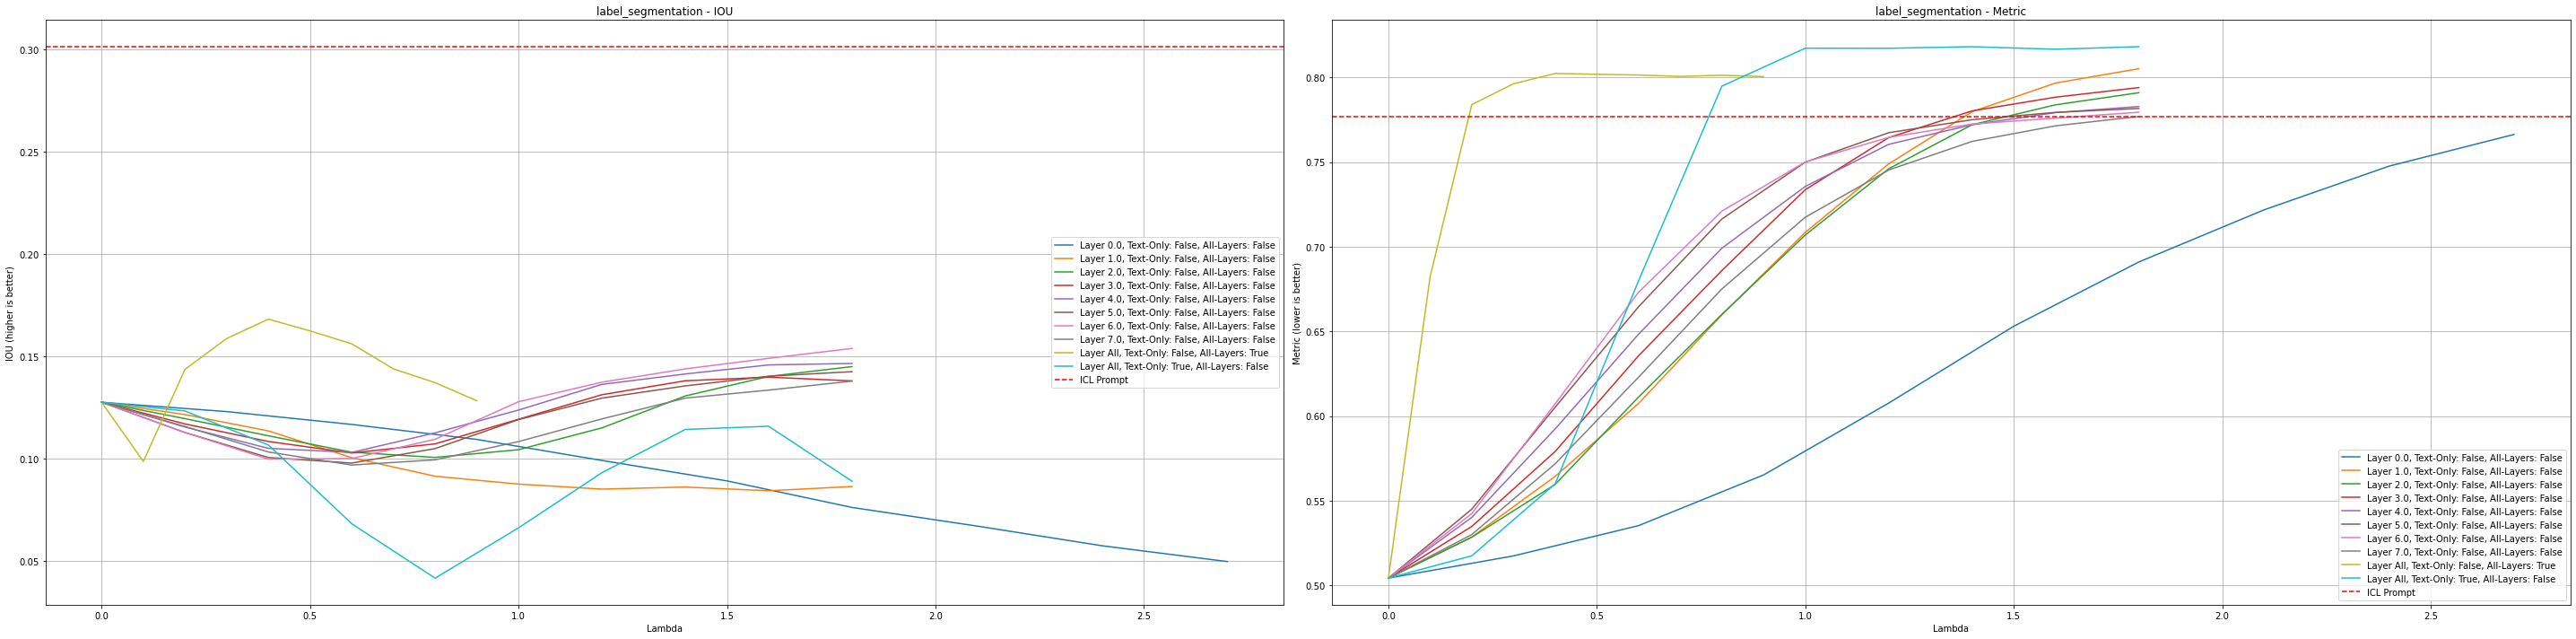

In [27]:
# Set the task to 'label_segmentation'
task = 'label_segmentation'

# Setting up the grid for plotting - only one row and two columns
num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 10))

# Filter the dataframe for the current task
df_task = df[df['task'] == task]
df_baseline = df_task

# Group by 'lambda', 'layer', 'text_only', and 'all_layers' and calculate the mean for each group
grouped_data_iou = df_task.groupby(['lambda', 'layer', 'text_only', 'all_layers'])[['iou', 'r_iou']].mean().reset_index()
grouped_data_metric = df_task.groupby(['lambda', 'layer', 'text_only', 'all_layers'])[['accuracy', 'r_accuracy']].mean().reset_index()

# Plot one line for each layer textonly and alllayers variable combination for 'iou' and 'r_iou'
for (layer, text_only, all_layers), group in grouped_data_iou.groupby(['layer', 'text_only', 'all_layers']):
    label = f'Layer {layer}, Text-Only: {text_only}, All-Layers: {all_layers}'
    axes[0].plot(np.array(group['lambda']), np.array(group['iou']), label=label)
    #axes[0].plot(np.array(group['lambda']), np.array(group['r_iou']), label=label)

# Add a legend to the plot
axes[0].legend(loc=0)
baseline_iou = df_baseline[df_baseline['lambda'].isna()]["iou"].mean()
axes[0].axhline(y=baseline_iou, color='red', linestyle='--', label='ICL Prompt')

axes[0].set_title(task + ' - IOU')
axes[0].set_xlabel('Lambda')
axes[0].set_ylabel('IOU (higher is better)')
axes[0].legend()
axes[0].grid(True)

# Plot one line for each layer textonly and alllayers variable combination for 'accuracy' and 'r_accuracy'
for (layer, text_only, all_layers), group in grouped_data_metric.groupby(['layer', 'text_only', 'all_layers']):
    label = f'Layer {layer}, Text-Only: {text_only}, All-Layers: {all_layers}'
    axes[1].plot(np.array(group['lambda']), np.array(group['accuracy']), label=label)
    #axes[1].plot(np.array(group['lambda']), np.array(group['r_accuracy']), label=label)

# Add a legend to the plot
axes[1].legend(loc=0)
baseline_metric = df_baseline[df_baseline['lambda'].isna()]["accuracy"].mean()
axes[1].axhline(y=baseline_metric, color='red', linestyle='--', label='ICL Prompt')

axes[1].set_title(task + ' - Metric')
axes[1].set_xlabel('Lambda')
axes[1].set_ylabel('Metric (lower is better)')
axes[1].legend()
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


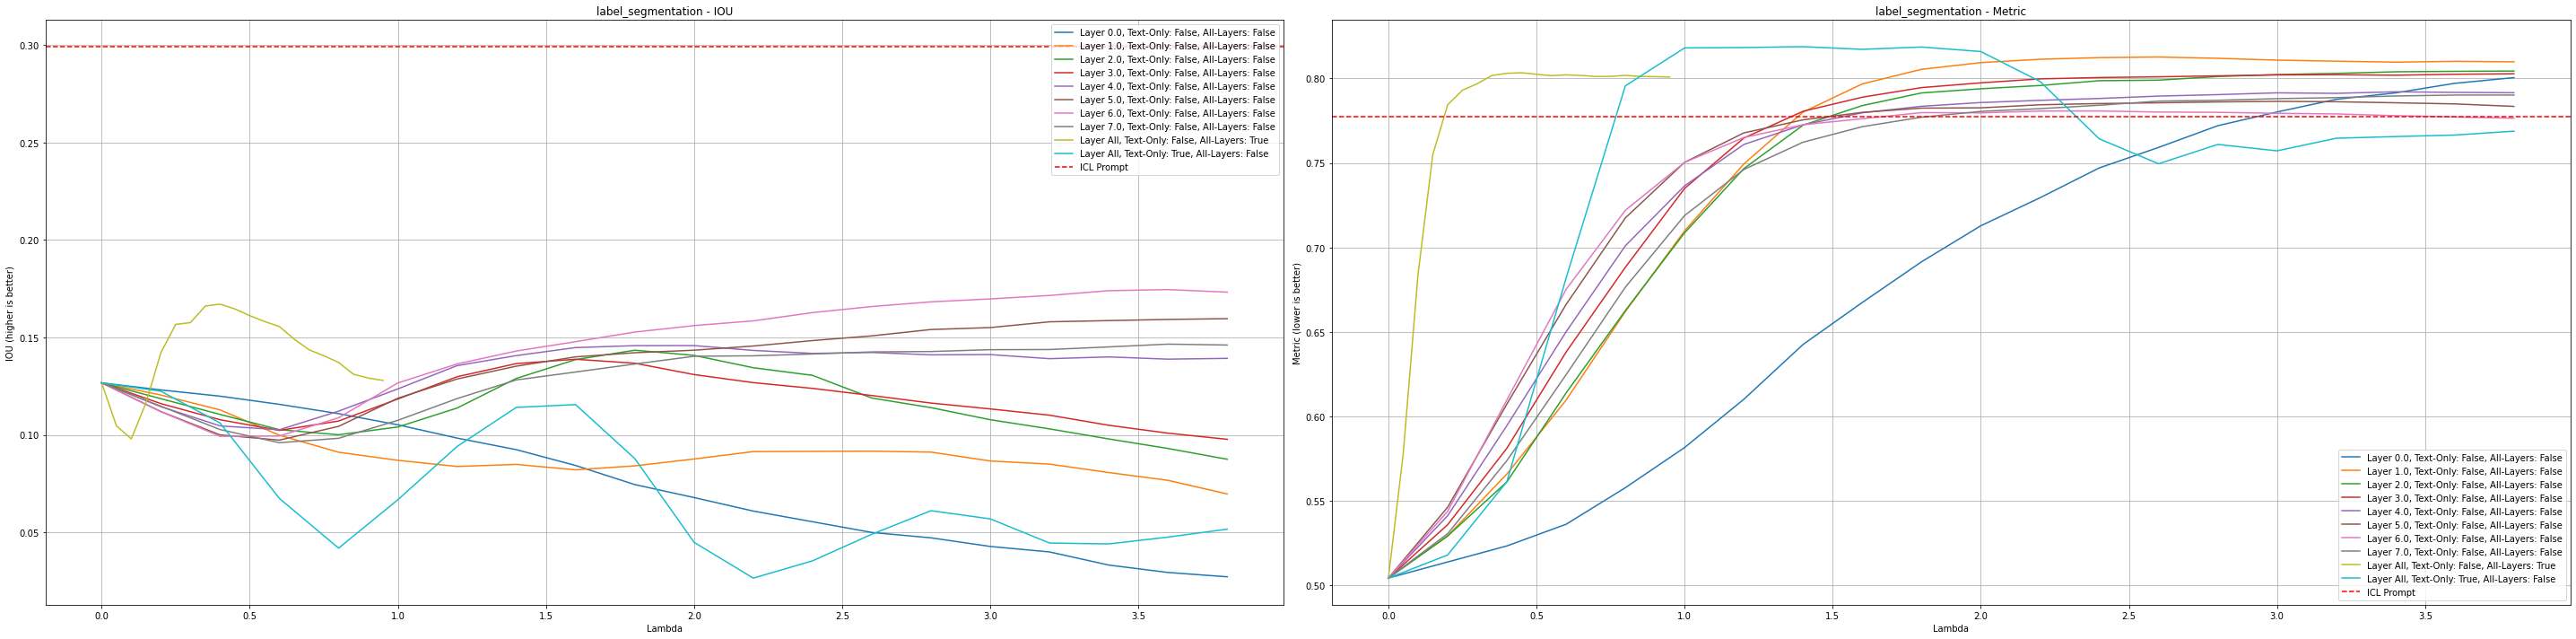

In [58]:
# Set the task to 'label_segmentation'
task = 'label_segmentation'

# Setting up the grid for plotting - only one row and two columns
num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 10))

# Filter the dataframe for the current task
df_task = df[df['task'] == task]
df_baseline = df_task

# Group by 'lambda', 'layer', 'text_only', and 'all_layers' and calculate the mean for each group
grouped_data_iou = df_task.groupby(['lambda', 'layer', 'text_only', 'all_layers'])[['iou', 'r_iou']].mean().reset_index()
grouped_data_metric = df_task.groupby(['lambda', 'layer', 'text_only', 'all_layers'])[['accuracy', 'r_accuracy']].mean().reset_index()

# Plot one line for each layer textonly and alllayers variable combination for 'iou' and 'r_iou'
for (layer, text_only, all_layers), group in grouped_data_iou.groupby(['layer', 'text_only', 'all_layers']):
    label = f'Layer {layer}, Text-Only: {text_only}, All-Layers: {all_layers}'
    axes[0].plot(np.array(group['lambda']), np.array(group['iou']), label=label)
    #axes[0].plot(np.array(group['lambda']), np.array(group['r_iou']), label=label)

# Add a legend to the plot
axes[0].legend(loc=0)
baseline_iou = df_baseline[df_baseline['lambda'].isna()]["iou"].mean()
axes[0].axhline(y=baseline_iou, color='red', linestyle='--', label='ICL Prompt')

axes[0].set_title(task + ' - IOU')
axes[0].set_xlabel('Lambda')
axes[0].set_ylabel('IOU (higher is better)')
axes[0].legend()
axes[0].grid(True)

# Plot one line for each layer textonly and alllayers variable combination for 'accuracy' and 'r_accuracy'
for (layer, text_only, all_layers), group in grouped_data_metric.groupby(['layer', 'text_only', 'all_layers']):
    label = f'Layer {layer}, Text-Only: {text_only}, All-Layers: {all_layers}'
    axes[1].plot(np.array(group['lambda']), np.array(group['accuracy']), label=label)
    #axes[1].plot(np.array(group['lambda']), np.array(group['r_accuracy']), label=label)

# Add a legend to the plot
axes[1].legend(loc=0)
baseline_metric = df_baseline[df_baseline['lambda'].isna()]["accuracy"].mean()
axes[1].axhline(y=baseline_metric, color='red', linestyle='--', label='ICL Prompt')

axes[1].set_title(task + ' - Metric')
axes[1].set_xlabel('Lambda')
axes[1].set_ylabel('Metric (lower is better)')
axes[1].legend()
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [63]:
df["layer"] = df["layer"].apply(lambda x: "All" if pd.isna(x) else x)
df["layer"].unique()

array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'], dtype=object)

In [64]:
df["text_only"] = df["text_only"].apply(lambda x: False if pd.isna(x) else x)
df["all_layers"] = df["all_layers"].apply(lambda x: False if pd.isna(x) else x)


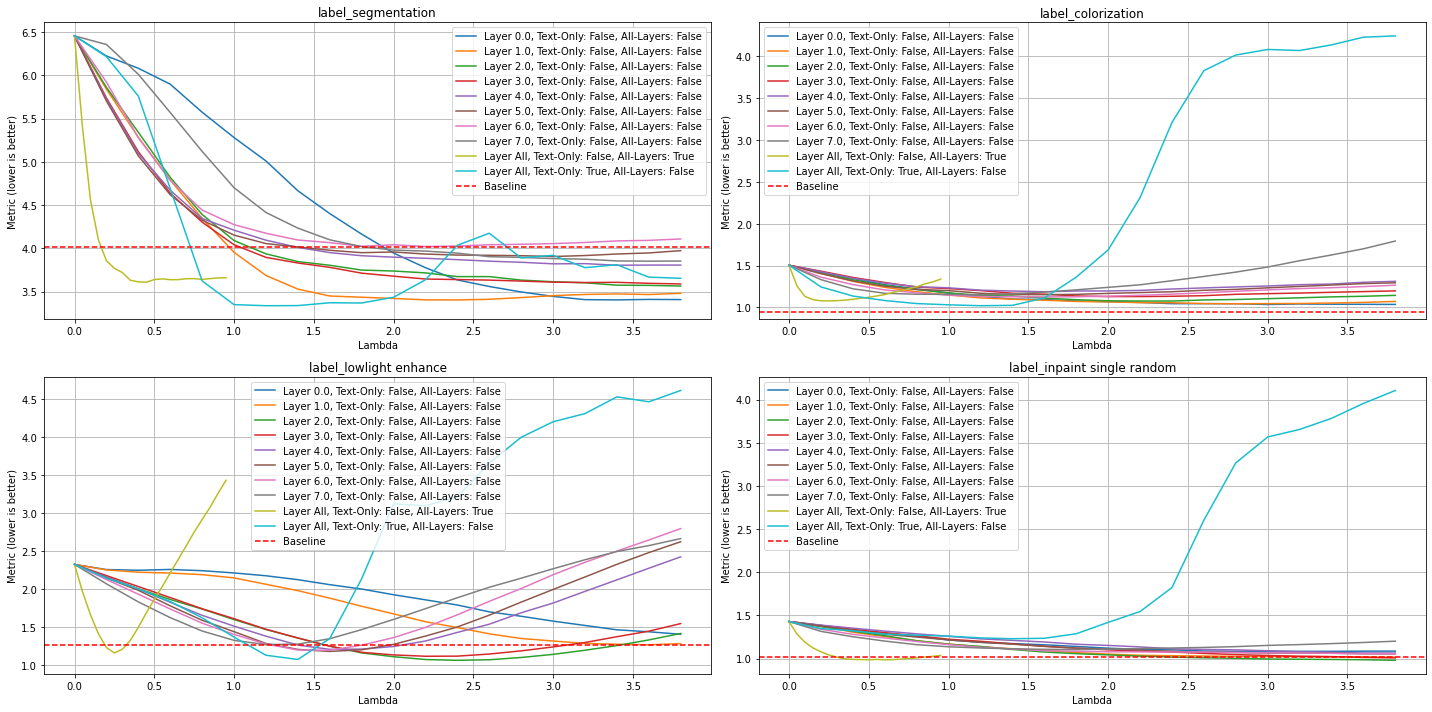

In [65]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Filter the dataframe for the current task
    df_task = df[df['task'] == task]

    # Group by 'lambda', 'layer', 'text_only', and 'all_layers' and calculate the mean metric
    grouped_data = df_task.groupby(['lambda', 'layer', 'text_only', 'all_layers'])['metric'].mean().reset_index()
    # Plot one line for each layer textonly and alllayers variable combination
    for (layer, text_only, all_layers), group in grouped_data.groupby(['layer', 'text_only', 'all_layers']):
        label = f'Layer {layer}, Text-Only: {text_only}, All-Layers: {all_layers}'
        axes[row, col].plot(np.array(group['lambda']), np.array(group['metric']), label=label)

    # Calculate and plot the baseline
    baseline = df_task[df_task['lambda'].isna()]["metric"].mean()
    axes[row, col].axhline(y=baseline, color='red', linestyle='--', label='Baseline')

    # Add a legend to the plot
    axes[row, col].legend()
    axes[row, col].set_title(task)
    axes[row, col].set_xlabel('Lambda')
    axes[row, col].set_ylabel('Metric (lower is better)')
    axes[row, col].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

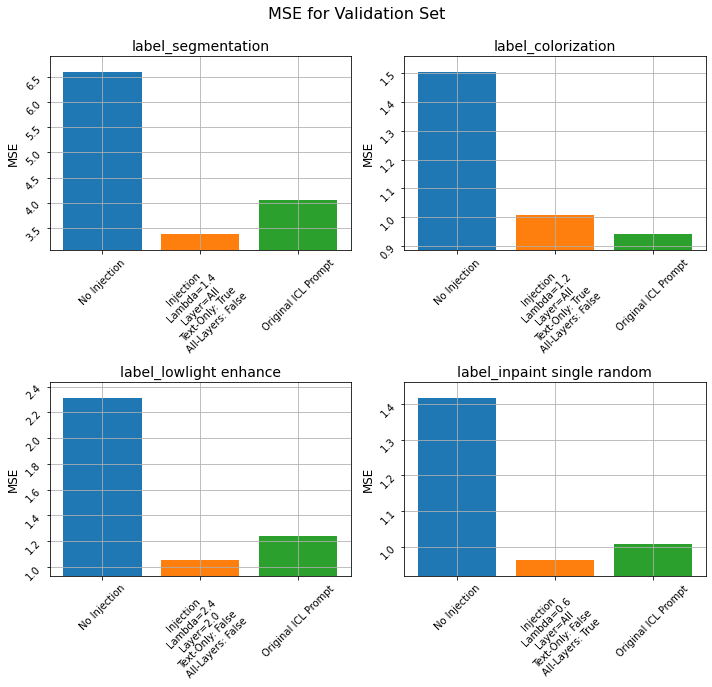

In [55]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))  # Adjusted for more space

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    row = i // num_cols
    col = i % num_cols
    df_task = df[df['task'] == task]
    grouped_data = df_task.groupby(['lambda', 'layer', 'text_only', 'all_layers'])[['metric',"r_metric"]].mean().reset_index()

    lambda_zero_metric = grouped_data[grouped_data['lambda'] == 0]['metric'].mean()
    baseline_metric = df_task[df_task['lambda'].isna()]["metric"].mean()
    best_lambda_layer_index = grouped_data['metric'].idxmin()
    best_lambda = grouped_data.loc[best_lambda_layer_index, 'lambda']
    best_layer = grouped_data.loc[best_lambda_layer_index, 'layer']
    best_text_only = grouped_data.loc[best_lambda_layer_index, 'text_only']
    best_all_layers = grouped_data.loc[best_lambda_layer_index, 'all_layers']
    best_lambda_layer_metric = grouped_data.loc[best_lambda_layer_index, 'metric']

    bar_labels = ['No Injection', f'Injection\nLambda={best_lambda:.1f}\nLayer={best_layer}\nText-Only: {best_text_only}\nAll-Layers: {best_all_layers}', 'Original ICL Prompt']
    bar_values = [lambda_zero_metric, best_lambda_layer_metric, baseline_metric]
    axes[row, col].bar(bar_labels, bar_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Example colors

    axes[row, col].set_title(task, fontsize=14)
    axes[row, col].set_ylabel('MSE', fontsize=12)
    axes[row, col].grid(True)
    axes[row, col].tick_params(labelrotation=45, labelsize=10)
    axes[row, col].set_ylim([min(bar_values)-0.1*(max(bar_values) - min(bar_values)), max(bar_values)+0.1*(max(bar_values) - min(bar_values))])  # Rotate labels and adjust size

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("MSE for Validation Set", fontsize=16)
plt.show()


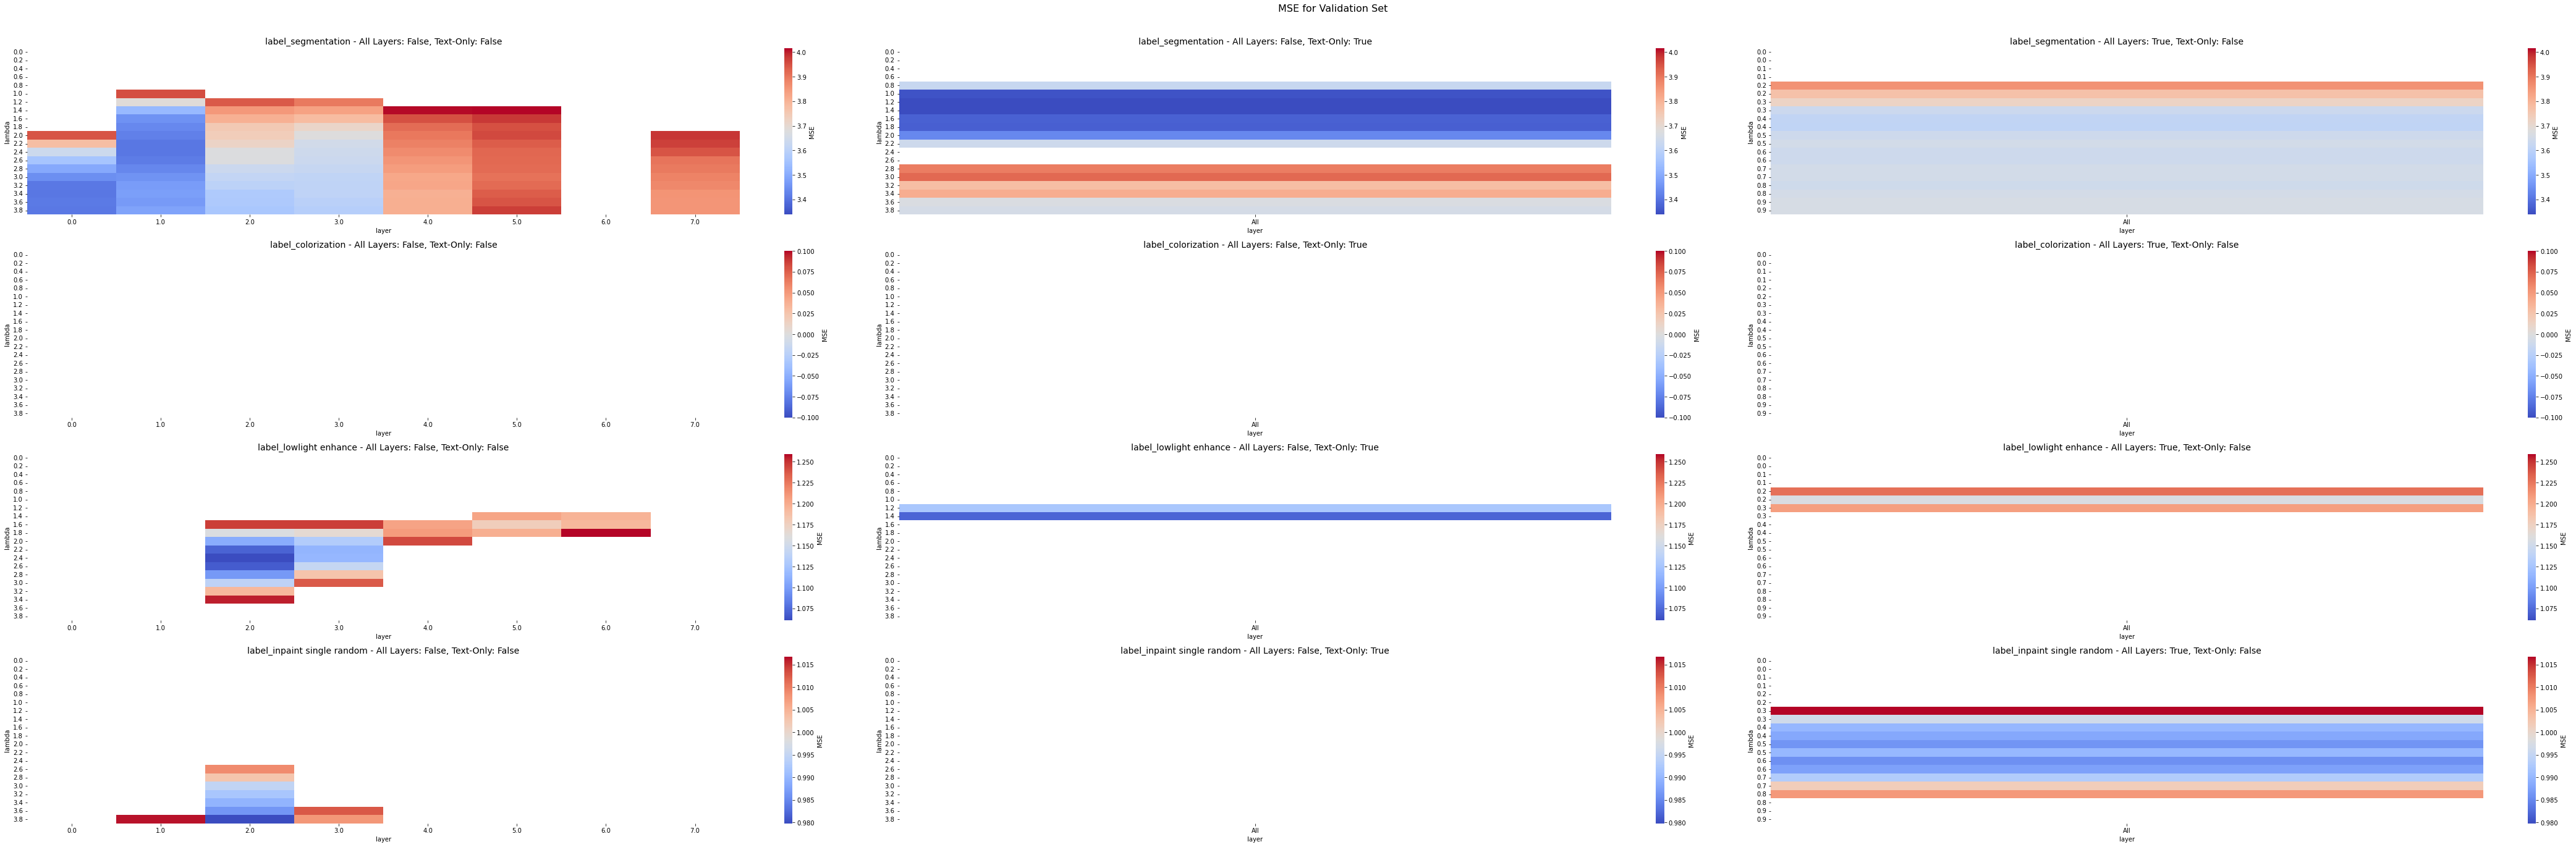

In [66]:
unique_tasks = ['label_segmentation', 'label_colorization', 'label_lowlight enhance', 'label_inpaint single random']
# Setting up the grid for plotting - assuming there are 3 unique tasks
num_rows = 4
num_cols = 3  # Changed to 3 columns to accommodate the new pivot tables
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 20))  # Adjusted for more space and additional column

# Iterating over each task and creating a heatmap
for i, task in enumerate(unique_tasks):
    df_task = df[df['task'] == task]
    df_baseline = df_task[df_task['lambda'].isna()]

    # Creating pivot tables for the specified conditions
    pivot_table_all_layers_false_textonly_false = df_task[(df_task['all_layers'] == False) & (df_task['text_only'] == False)].pivot_table(index='lambda', columns='layer', values='metric')
    pivot_table_all_layers_false_textonly_true = df_task[(df_task['all_layers'] == False) & (df_task['text_only'] == True)].pivot_table(index='lambda', columns='layer', values='metric')
    pivot_table_all_layers_true_textonly_false = df_task[(df_task['all_layers'] == True) & (df_task['text_only'] == False)].pivot_table(index='lambda', columns='layer', values='metric')

    # Get the baseline metric for the task
    baseline_metric = df_baseline["metric"].mean()

    # Set cells with worse performance than the baseline to NaN
    pivot_table_all_layers_false_textonly_false = pivot_table_all_layers_false_textonly_false.mask(pivot_table_all_layers_false_textonly_false > baseline_metric)
    pivot_table_all_layers_false_textonly_true = pivot_table_all_layers_false_textonly_true.mask(pivot_table_all_layers_false_textonly_true > baseline_metric)
    pivot_table_all_layers_true_textonly_false = pivot_table_all_layers_true_textonly_false.mask(pivot_table_all_layers_true_textonly_false > baseline_metric)

    # Get the minimum and maximum metric values across all pivot tables for consistent colorscale
    vmin = min(pivot_table_all_layers_false_textonly_false.min().min(), pivot_table_all_layers_false_textonly_true.min().min(), pivot_table_all_layers_true_textonly_false.min().min())
    vmax = max(pivot_table_all_layers_false_textonly_false.max().max(), pivot_table_all_layers_false_textonly_true.max().max(), pivot_table_all_layers_true_textonly_false.max().max())

    # Plotting the heatmaps
    sns.heatmap(pivot_table_all_layers_false_textonly_false, ax=axes[i, 0], cmap='coolwarm', cbar_kws={'label': 'MSE'}, vmin=vmin, vmax=vmax)
    sns.heatmap(pivot_table_all_layers_false_textonly_true, ax=axes[i, 1], cmap='coolwarm', cbar_kws={'label': 'MSE'}, vmin=vmin, vmax=vmax)
    sns.heatmap(pivot_table_all_layers_true_textonly_false, ax=axes[i, 2], cmap='coolwarm', cbar_kws={'label': 'MSE'}, vmin=vmin, vmax=vmax)

    axes[i, 0].set_title(f"{task} - All Layers: False, Text-Only: False", fontsize=14)
    axes[i, 1].set_title(f"{task} - All Layers: False, Text-Only: True", fontsize=14)
    axes[i, 2].set_title(f"{task} - All Layers: True, Text-Only: False", fontsize=14)

    # Adjust y-axis labels to show only first 3 significant figures in lambda
    for col in range(num_cols):
        y_labels = axes[i, col].get_yticklabels()
        axes[i, col].set_yticklabels([label.get_text()[:3] for label in y_labels])

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("MSE for Validation Set", fontsize=16)
plt.show()


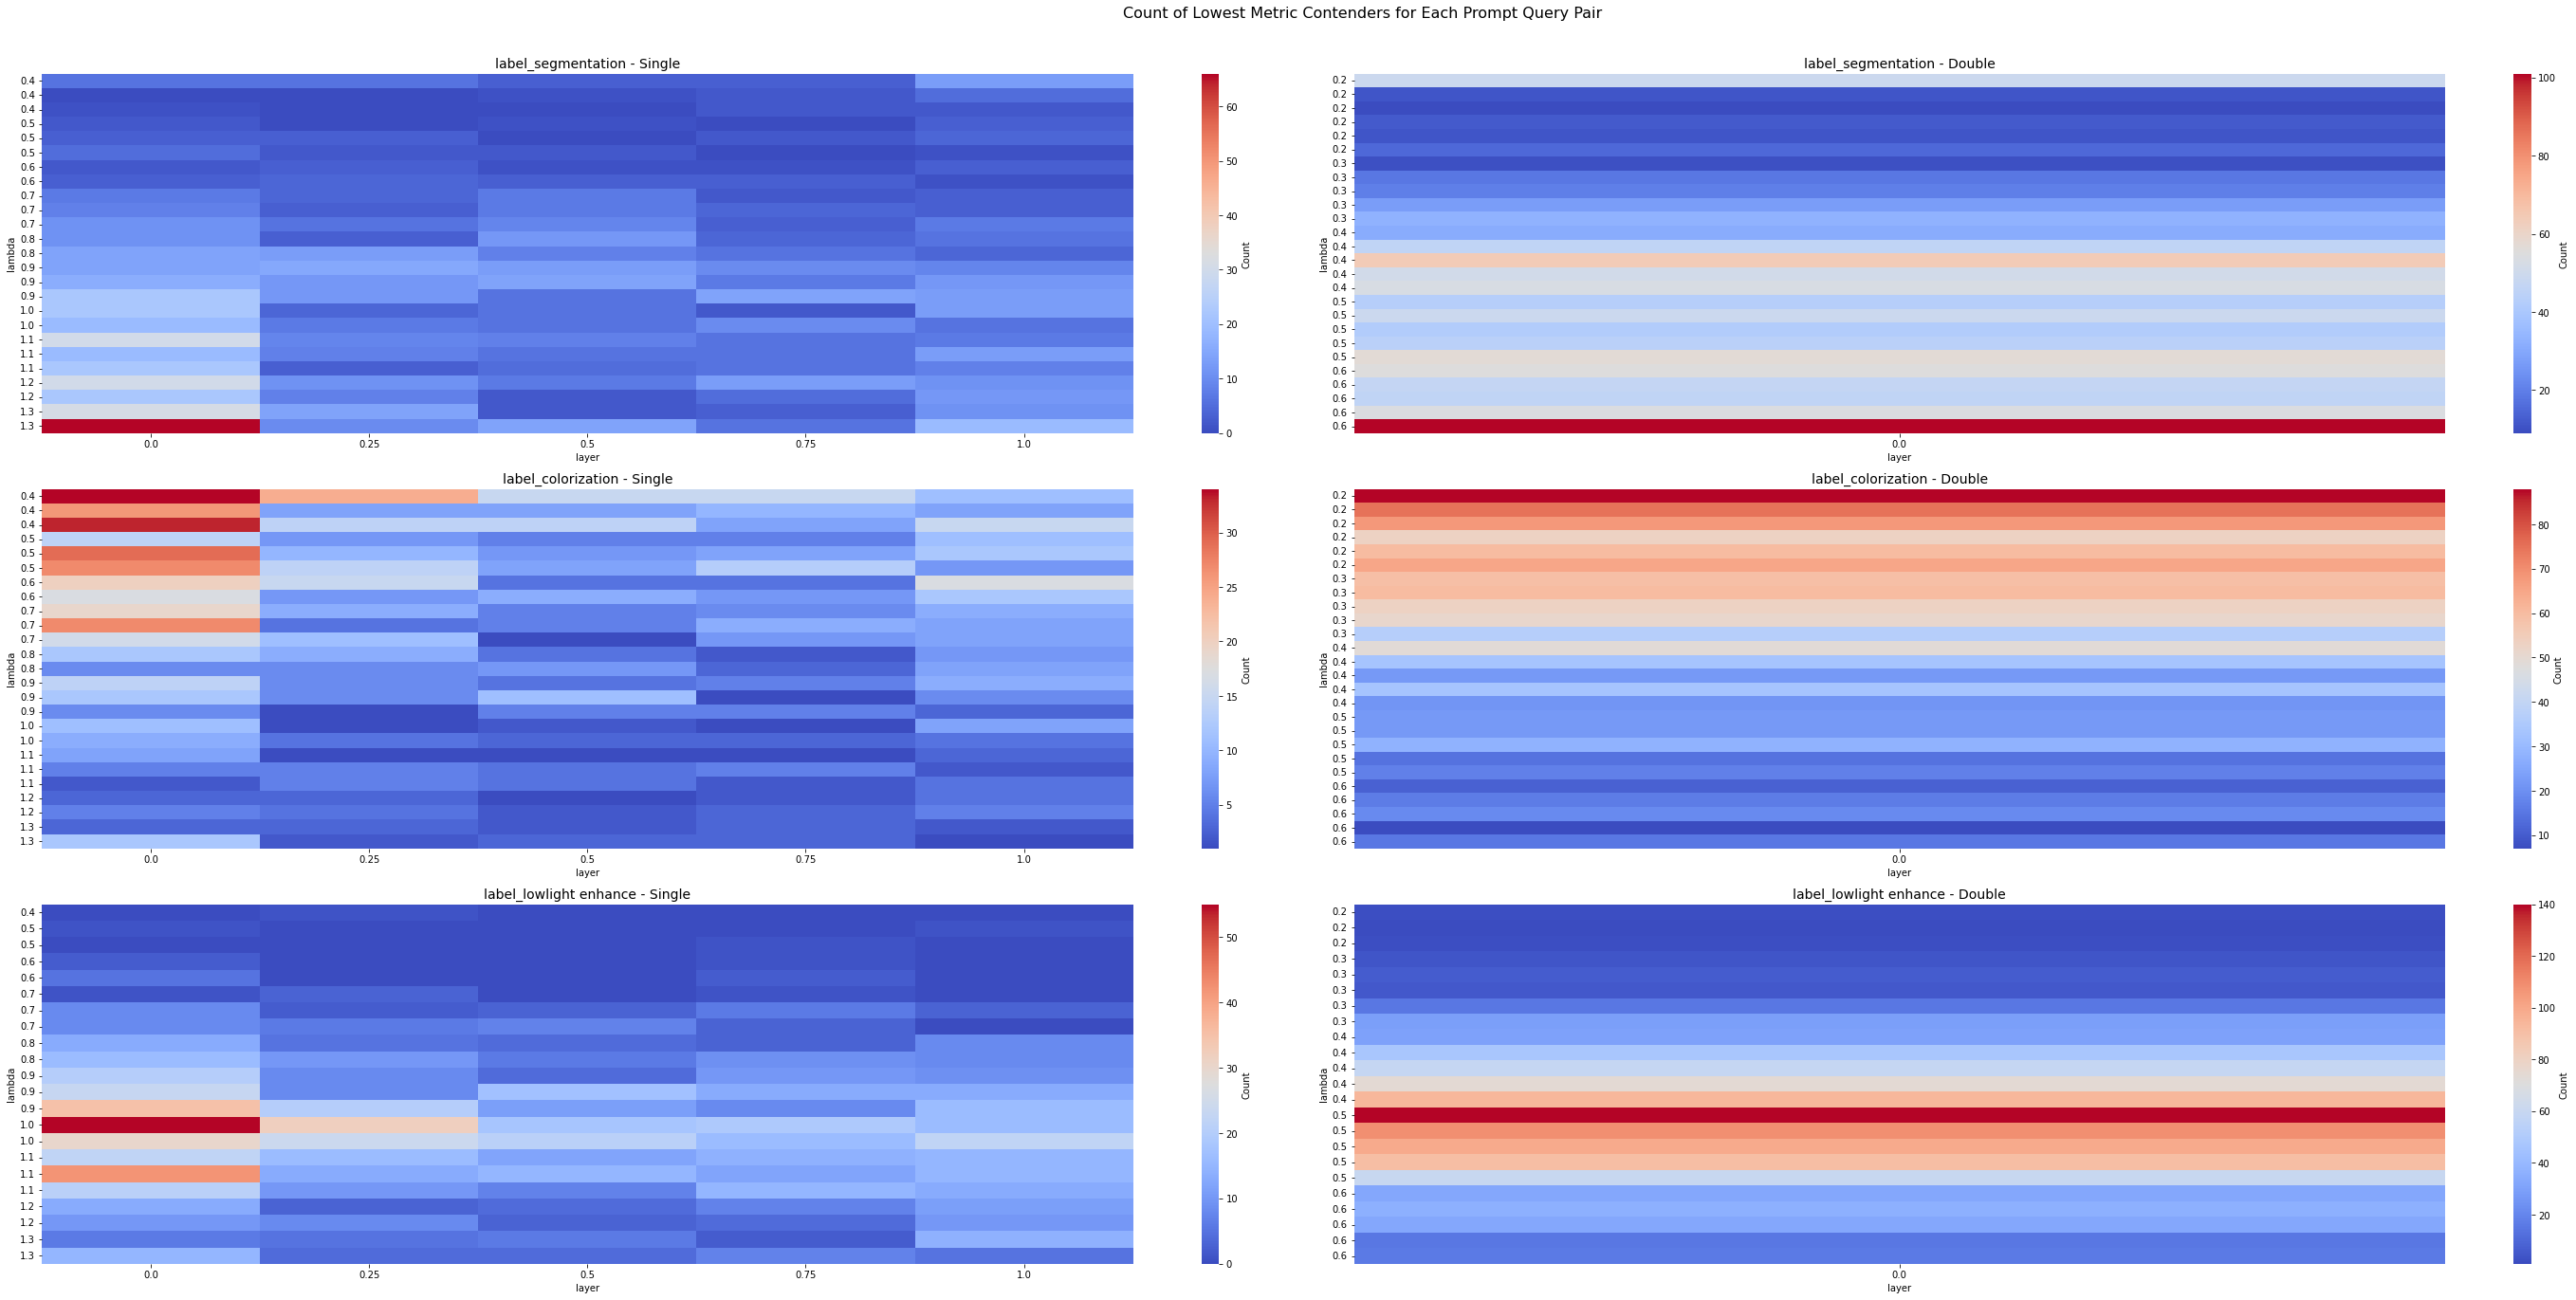

In [49]:
unique_tasks = ['label_segmentation', 'label_colorization', 'label_lowlight enhance']
# Setting up the grid for plotting - assuming there are 3 unique tasks
num_rows = 3
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 20))  # Adjusted for more space

# Iterating over each task and creating a heatmap
for i, task in enumerate(unique_tasks):
    df_task_single = df[(df['task'] == task) & (df['style'] == 'single')]
    df_task_double = df[(df['task'] == task) & (df['style'] == 'double')]
    df_baseline = df[df['task'] == task]

    # For each unique 'query_name' and 'support_name' combination, find the lambda and layer that minimizes the metric
    best_lambdas_single = df_task_single.groupby(['query_name', 'support_name'])['metric'].idxmin()
    best_lambda_data_single = df_task_single.loc[best_lambdas_single]
    best_lambdas_double = df_task_double.groupby(['query_name', 'support_name'])['metric'].idxmin()
    best_lambda_data_double = df_task_double.loc[best_lambdas_double]

    # Count the number of times each lambda and layer pair appears as a lowest metric contender
    lambda_layer_counts_single = best_lambda_data_single.groupby(['lambda', 'layer']).size().unstack(fill_value=0)
    lambda_layer_counts_double = best_lambda_data_double.groupby(['lambda', 'layer']).size().unstack(fill_value=0)

    # Plotting the heatmap
    sns.heatmap(lambda_layer_counts_single, ax=axes[i, 0], cmap='coolwarm', cbar_kws={'label': 'Count'})
    sns.heatmap(lambda_layer_counts_double, ax=axes[i, 1], cmap='coolwarm', cbar_kws={'label': 'Count'})
    axes[i, 0].set_title(f"{task} - Single", fontsize=14)
    axes[i, 1].set_title(f"{task} - Double", fontsize=14)

    y_labels_single = axes[i, 0].get_yticklabels()
    y_labels_double = axes[i, 1].get_yticklabels()

    axes[i, 0].set_yticklabels([label.get_text()[:3] for label in y_labels_single])  # Show only first 3 sig figs in lambda y axis
    axes[i, 1].set_yticklabels([label.get_text()[:3] for label in y_labels_double])  # Show only first 3 sig figs in lambda y axis

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("Count of Lowest Metric Contenders for Each Prompt Query Pair", fontsize=16)
plt.show()


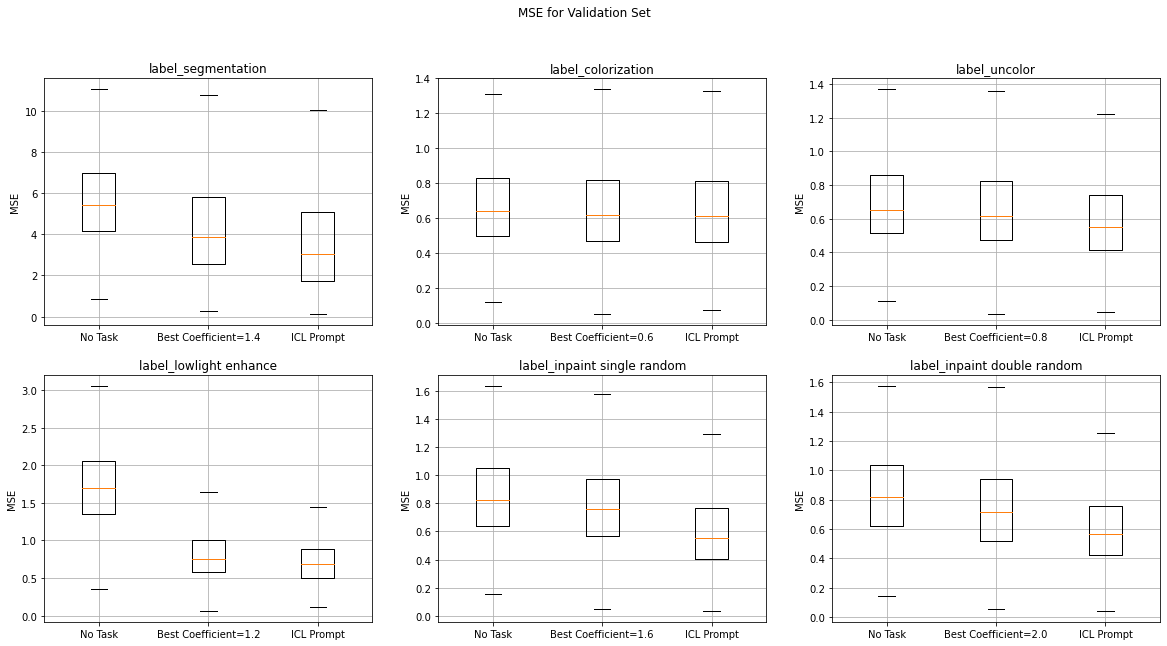